In [188]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import linregress

In [190]:
df = pd.read_csv("tips_dataset.csv")

# Display few rows of the dataset
print(df.head())

# Convert categorical variables to numeric
# Initialize LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

# Check for missing values
print(df.isnull().sum())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


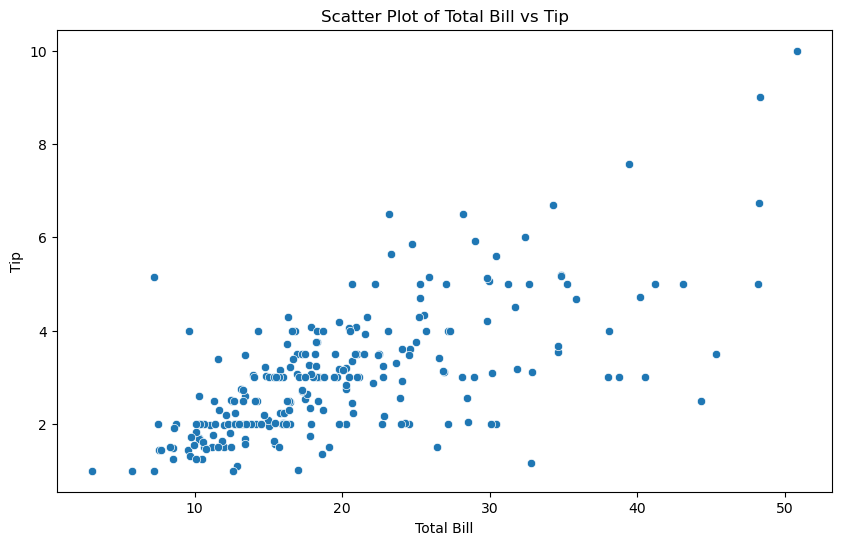

In [192]:
# Scatter Plot for total_bill vs tip
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Scatter Plot of Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

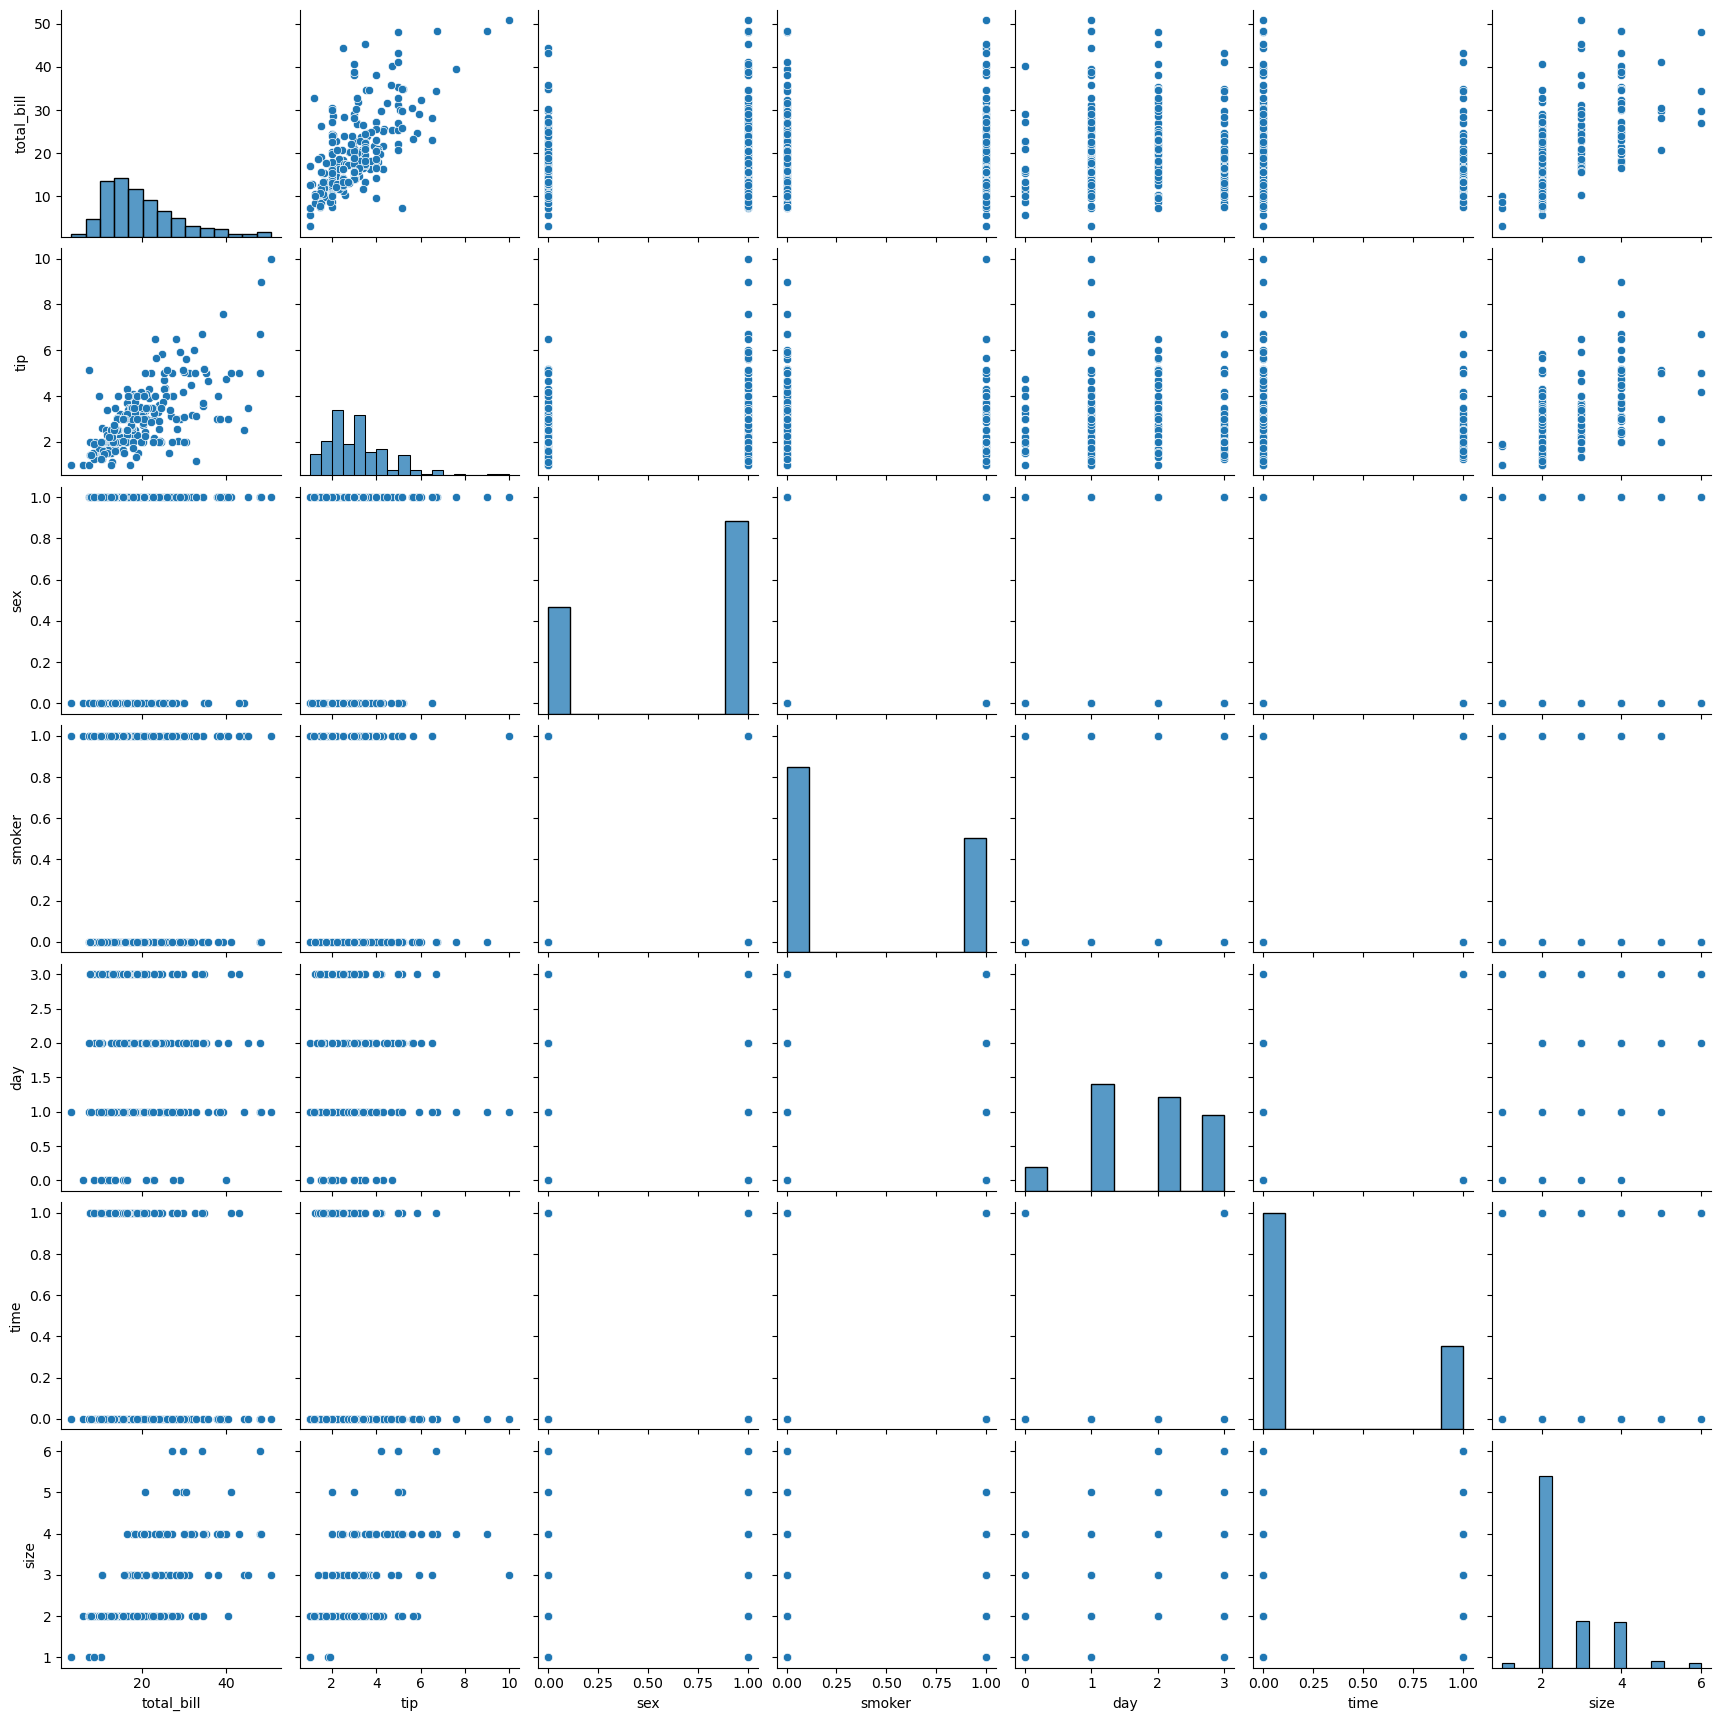

In [194]:
# Pairplot for multiple features
sns.pairplot(df)
plt.show()


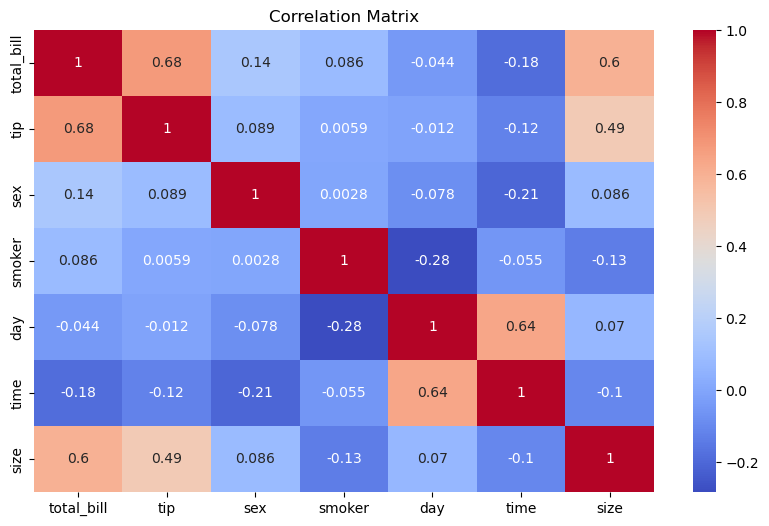

In [195]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [196]:
# Split the dataset into training and testing sets
X = df.drop('tip', axis=1)
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
# Initialize the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
# Print performance metrics
print(f"{name}:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"  MSE: {mean_squared_error(y_test, y_pred)}")
print(f"  R^2: {r2_score(y_test, y_pred)}\n")

K-Nearest Neighbors Regression:
  MAE: 0.7262448979591837
  MSE: 0.8382265306122448
  R^2: 0.3294034029001649



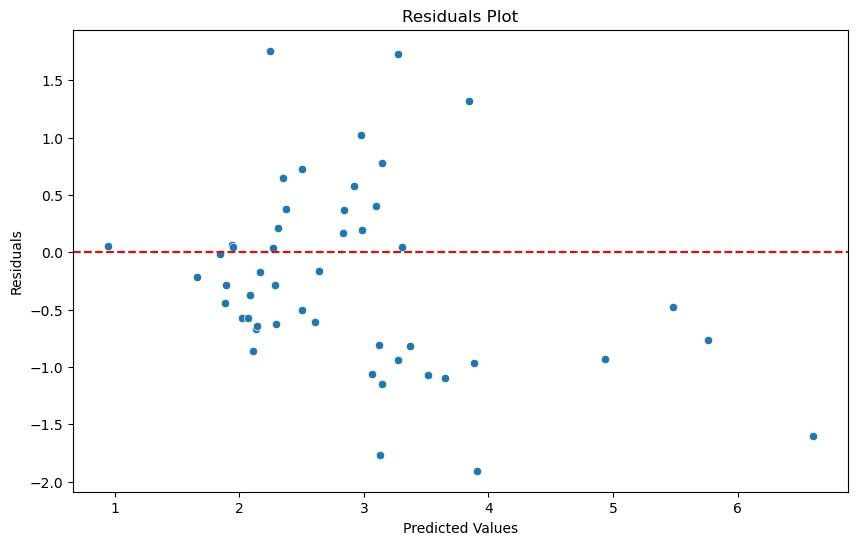

In [198]:
# taking liner regression model to plot residuals

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

residuals = y_test - y_pred

# Residuals plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [199]:
# Feature importance (for tree-based models)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

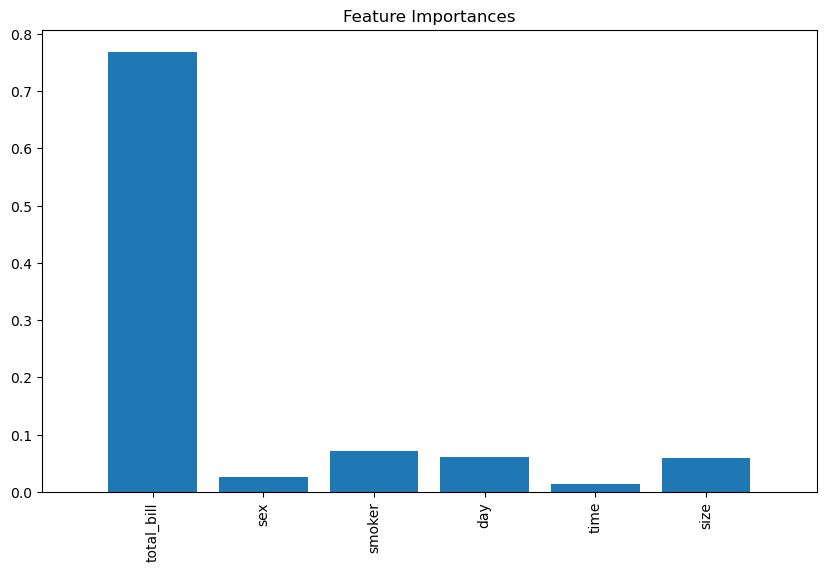

In [201]:
# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances, align="center")
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)  
plt.xlim([-1, X_train.shape[1]])
plt.show()

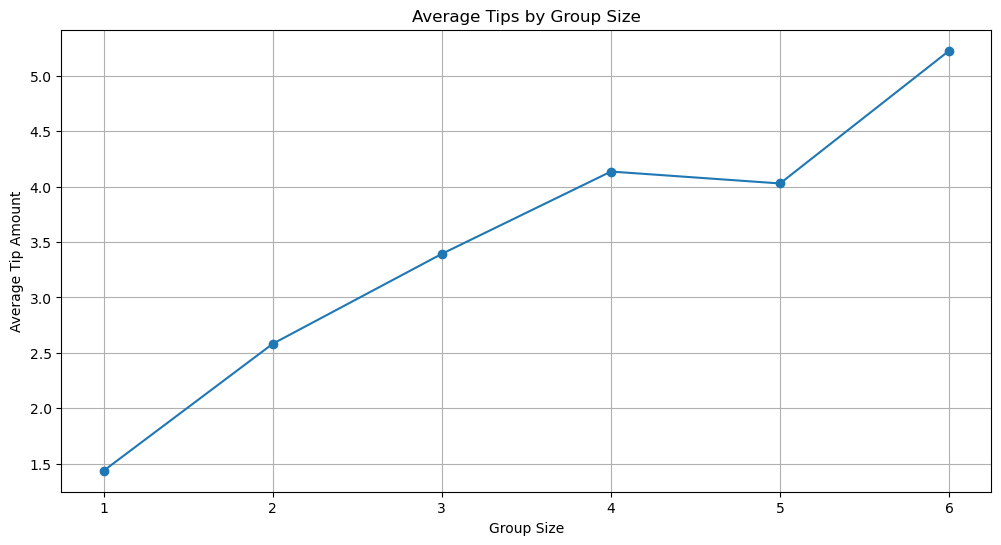

In [208]:
# Liner plot for Average tips by group size
average_tips_by_size = data.groupby('size')['tip'].mean()

plt.figure(figsize=(12, 6))
average_tips_by_size.plot(kind='line', marker='o')
plt.title('Average Tips by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Tip Amount')
plt.xticks(average_tips_by_size.index)
plt.grid()
plt.show()

In [210]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Add a constant to the model (intercept)
X = sm.add_constant(X)  

# Fit the linear regression model
model = sm.OLS(y, X).fit() # X is features and y is target variable

# Perform Rainbow test for linearity using the fitted model
statistic, p_value = linear_rainbow(model)
print(f'Rainbow Test Statistic: {statistic}, p-value: {p_value}')

Rainbow Test Statistic: 1.2036274510126592, p-value: 0.15798464222013225


# Some Insights from this data analysis:
## The Total bill amount significantly impacts the tip amount.
## People tend to tip more during dinner.
## The tip amount is proportional to group size.
## Males tend to give more tips.
## Tipping amount is usually high on saturday.
## Usually smokers tend to tip less than non-smokers. 